In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#cwd = os.getcwd()
#print(cwd)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
mouse_metadata_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_metadata_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = len(mouse_metadata_complete['Mouse ID'].unique())
print("number of mice")
mice_count

number of mice


249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_metadata_complete[mouse_metadata_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_mice["Mouse ID"].unique())

['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_metadata_complete[mouse_metadata_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_metadata_complete.drop(mouse_metadata_complete[mouse_metadata_complete['Mouse ID'] == "g989"].index)


In [9]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = len(clean_data["Mouse ID"].unique())
print(f"Updated number of unique mice IDs: {updated_mice_count}")

Updated number of unique mice IDs: 248


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary = pd.concat([mean, median, var, std, sem], axis=1)
drug_regimen_summary.columns = ['Mean', 
                        'Median', 
                        'Variance', 
                        'Std. Dev.', 
                        'Std. Err.']

drug_regimen_summary

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

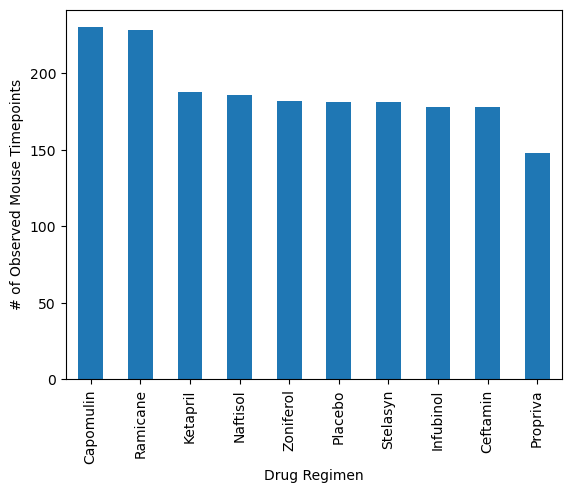

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_bar_chart = clean_data['Drug Regimen'].value_counts()

pandas_bar_chart.plot(kind='bar',
              xlabel='Drug Regimen',
              ylabel='# of Observed Mouse Timepoints')


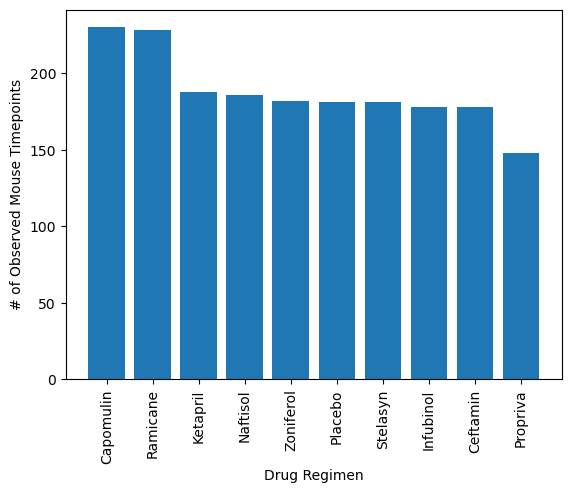

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by 'Drug Regimen' and count the number of timepoints.
pandas_bar_chart = clean_data['Drug Regimen'].value_counts()

#Create a bar plot
plt.bar(pandas_bar_chart.index, pandas_bar_chart)

#Add axis labels
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

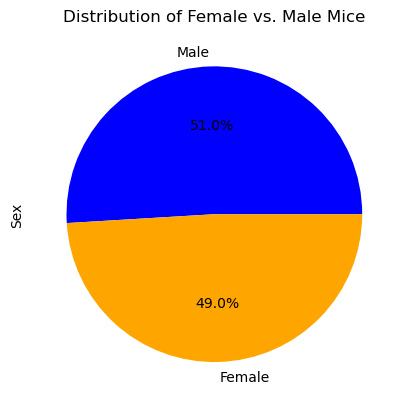

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Change male/female to integers
pandas_sex_data = clean_data['Sex'].value_counts()
pandas_sex_data

# Create Pie Chart
pandas_sex_data.plot.pie(autopct='%1.1f%%', labels=["Male","Female"], colors=["blue","orange"])

# Add a title/y-axis label
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')

plt.show()

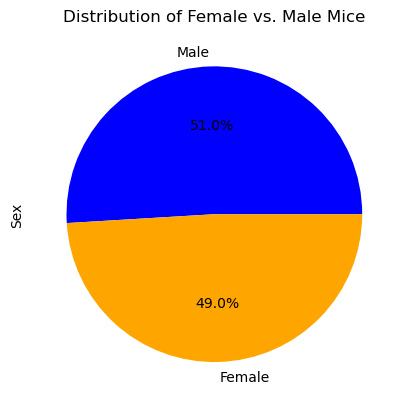

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Change male/female to integers
pyplot_sex_data = clean_data['Sex'].value_counts()
pyplot_sex_data

# Create Pie Chart
plt.pie(pyplot_sex_data, labels=["Male", "Female"], autopct='%1.1f%%', colors=["blue", "orange"])

# Add a title/y-axis label
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.show()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_data[clean_data['Drug Regimen'].isin(treatments)]\
    .groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()\
    .reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
consolidated_clean_data = pd.merge(final_timepoints, clean_data, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='inner')

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate IQR for each treatment regimen and identify potential outliers
for treatment in treatment_list:
    # Filter the data for the current treatment
    treatment_data = consolidated_clean_data[consolidated_clean_data['Drug Regimen'] == treatment]
    
    # Calculate quartiles
    quartiles = treatment_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    
    # Calculate IQR
    iqr = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Quantitatively determine if there are any outliers
    if outliers.empty:
        print(f"No potential outliers for {treatment}.")
    else:
        print(f"Potential outliers for {treatment}:")
        print(outliers[['Mouse ID', 'Tumor Volume (mm3)']])
    
    
    # Append the outliers to the tumor volume data list
    tumor_volume_data.append(outliers['Tumor Volume (mm3)'])


No potential outliers for Capomulin.
No potential outliers for Ramicane.
Potential outliers for Infubinol:
   Mouse ID  Tumor Volume (mm3)
15     c326           36.321346
No potential outliers for Ceftamin.


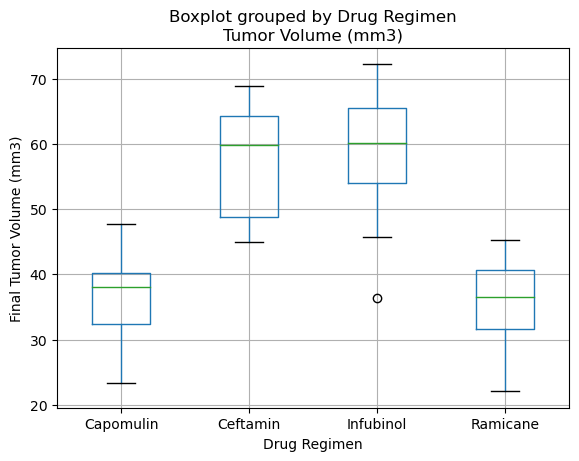

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

consolidated_clean_data.boxplot(column="Tumor Volume (mm3)", by= "Drug Regimen")

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [19]:
drug_regimen = 'Capomulin'

# Filter clean_data DF to show only the Mouse IDs for Capomulin
mouse_ids_Capomulin = clean_data[clean_data['Drug Regimen'] == drug_regimen]['Mouse ID']

mouse_ids_Capomulin

10      s185
11      s185
12      s185
13      s185
14      s185
        ... 
440     i557
1452    r157
1453    r157
1454    r157
1455    r157
Name: Mouse ID, Length: 230, dtype: object

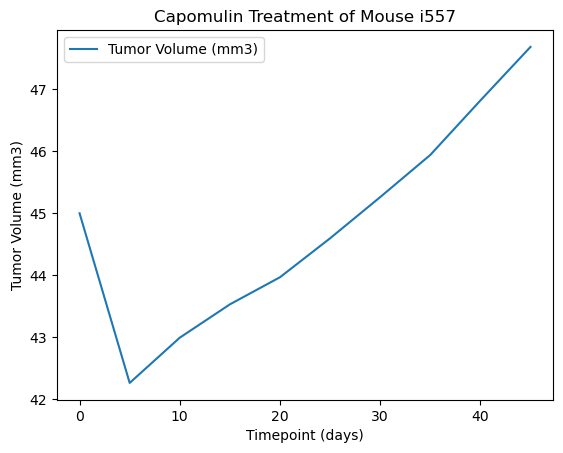

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_clean_data = clean_data[clean_data['Mouse ID'] == "i557"]
capomulin_clean_data

#Create Line graph
capomulin_clean_data.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')

# Add title and axis labels
plt.title('Capomulin Treatment of Mouse i557')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

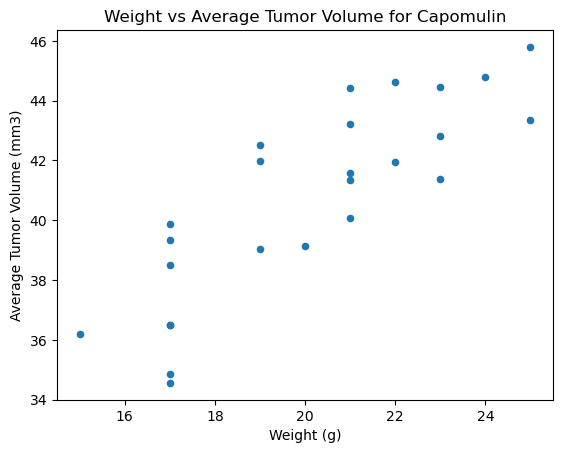

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

drug_regimen = 'Capomulin'
clean_data_capomulin = clean_data[clean_data['Drug Regimen'] == drug_regimen]
weight_vs_tumor_avg = clean_data_capomulin.groupby('Mouse ID').agg({'Weight (g)': ['mean'], 'Tumor Volume (mm3)': ['mean']})
weight_vs_tumor_avg

#Create Scatter Plot
weight_vs_tumor_avg.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')

# Add title and axis labels
plt.title('Weight vs Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Show Plot
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


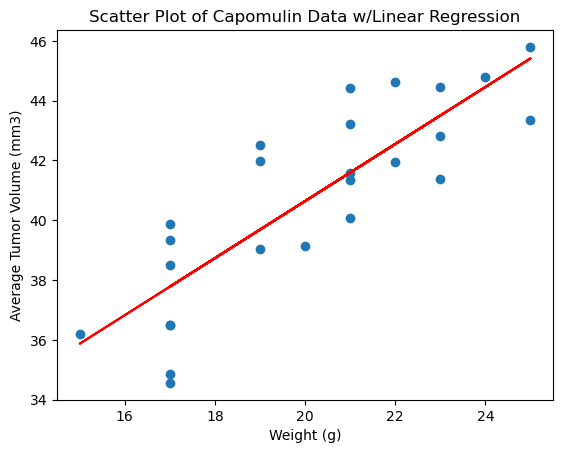

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#y = mx + b
avg_volume_df = clean_data_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = clean_data_capomulin.groupby("Mouse ID")["Weight (g)"].first()

weight_and_avg_df = pd.concat([mouse_weight,avg_volume_df], axis=1)

# Calculate the correlation coefficient between weight and tumor volume
correlation = round(weight_and_avg_df["Weight (g)"].corr(weight_and_avg_df["Tumor Volume (mm3)"]),2)

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(weight_and_avg_df['Weight (g)'], weight_and_avg_df['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(weight_and_avg_df['Weight (g)'], weight_and_avg_df['Tumor Volume (mm3)'])

# Add the linear regression line to the plot
plt.plot(weight_and_avg_df['Weight (g)'], slope * weight_and_avg_df['Weight (g)'] + intercept, color="red")

# Add title and axis labels
plt.title('Scatter Plot of Capomulin Data w/Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

plt.show()